# Prediction using Supervised ML

#### Here in this task I have to predict the scores based on Hours of study. I will use Linear Regression Algorithm to predict the marks

### Name - Sanjeev Kumar

### Load libraries

In [1]:
# Loading all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

## Investigate Data

In [2]:
# loading data
df = pd.read_csv('student_scores.csv')
print('Successful')

Successful


In [3]:
#first 5 rows of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# last 5 rows of data
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# dimension of data
print(df.shape)

(25, 2)


Conclusions:-
    The data has 25 rows and 2 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### both the features Hours and Scores are numeric in nature

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# check data contains any null value
df.isnull().any().sum()

0

Conclusion:- Data doesn't contain any null values.

## Visualization of Data

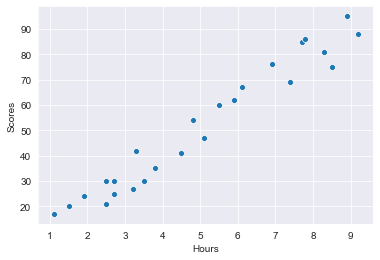

In [9]:
# plot scatter plot for Hours and Scores
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.show()

from the plot we can say there is positive relationship between Hours and Scores

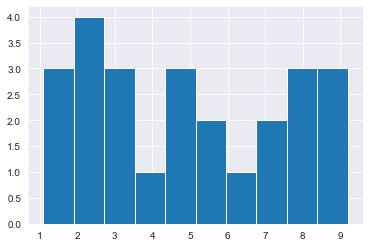

In [10]:
# Lets see distribution of Hours
plt.hist(df['Hours'])
plt.show()

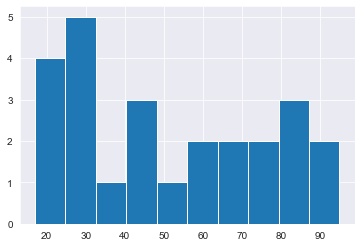

In [11]:
# distributions of scores
plt.hist(df['Scores'])
plt.show()

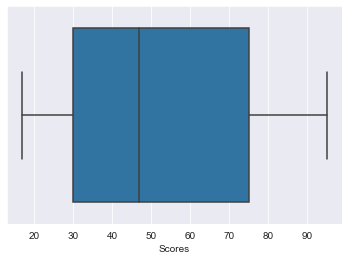

In [12]:
# plot boxplot on Scores
sns.boxplot(df['Scores'])
plt.show()

### Conclusions:-
##### From this box plot we can say 25% of students scored less than 30 marks, 50%  of students scored approaxmately less than 50 marks and 75% percent of student scored approaxmately less than 78 marks.

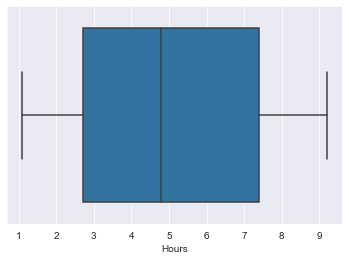

In [13]:
# box plot on Hours
sns.boxplot(df['Hours'])
plt.show()

### Conclusions:-
##### From this box plot we can say 25% of students studied approxamately less than 2.9 hours, 50%  of students studied approxamately less than 5 hours and 75% percent of students studied approxamately less than 7.5 hours

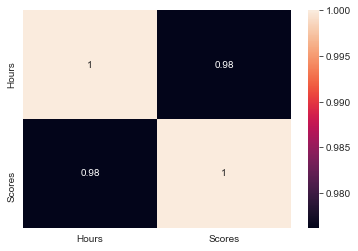

In [14]:
### check correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

#### From here we can see that 98% relationship between Hours and Scores.

### Data Preparation

In [15]:
# dividing data into Featurs and targets X and y respectively
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#### Now we will split datasets into training and test data. 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y
                                                    ,test_size=0.2,
                                                    random_state=102)

### Model training 

In [17]:
# importing Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

# creating object of the  model
model = LinearRegression()

# fitting data to the model
model.fit(X_train,y_train)

print('Training Completed')

Training Completed


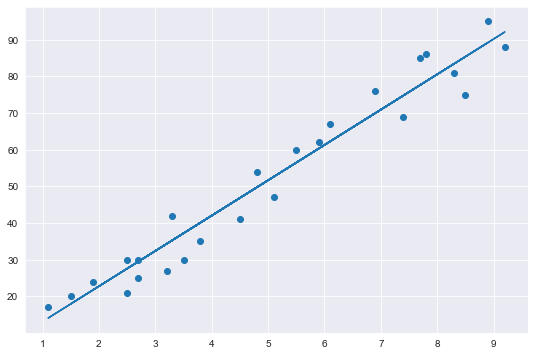

In [18]:
m = model.coef_
b = model.intercept_

# Plotting the regression line
line = m*X + b

# Plotting for the test data
plt.figure(figsize=(9,6))
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Prediction Phase

In [19]:
model.score(X_test,y_test)

0.9362575291988267

#### above result shows that model accuracy is 93%. Which means out of 100 model will predict 93 correct result. 

In [20]:
# Predicting the scores
y_pred = model.predict(X_test) 

In [21]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,47,52.612655
1,41,46.829599
2,20,17.914320
3,85,77.672564
4,35,40.082701


In [22]:
# now lets predict the our data
hour = 9.25
pred = model.predict([[hour]])
print('Hours of study {}'.format(hour))
print('Predicted marks {}'.format(pred[0]))

Hours of study 9.25
Predicted marks 92.61212435942795


### Evaluating the model
Here, we will evaluate the model performance based on Mae which Mean asbsolute error

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.1876142757684
